In [201]:
!pip install seaborn
!pip install imblearn
!pip install imbalanced-learn

### Import 

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE


### Data Exploration and Cleanup

In [203]:
df = pd.read_csv('/Users/asmae/Documents/GitHub/assignment_2_ML/bmi.csv')

print("Dataset Information:")
print(df.info())

print("Missing values")
print(df.isnull().sum())

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
Missing values
Gender    0
Height    0
Weight    0
Index     0
dtype: int64

First 5 Rows:
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

Summary Statistics:
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000

### Exploratory Data Analysis (EDA)

#### What does each index map to:

In [204]:
bmi_mapping = {
    0: "Extremely Underweight",
    1: "Underweight",
    2: "Normal Weight",
    3: "Overweight",
    4: "Obese",
    5: "Extremely Obese"
}
df['BMI_Category'] = df['Index'].map(bmi_mapping)

print("Data Head:")
print(df.head(), "\n")

Data Head:
   Gender  Height  Weight  Index   BMI_Category
0    Male     174      96      4          Obese
1    Male     189      87      2  Normal Weight
2  Female     185     110      4          Obese
3  Female     195     104      3     Overweight
4    Male     149      61      3     Overweight 



/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/488351861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Index'], palette="viridis")
/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/488351861.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([bmi_mapping[i] for i in sorted(df['Index'].unique())], rotation=30, ha="right")


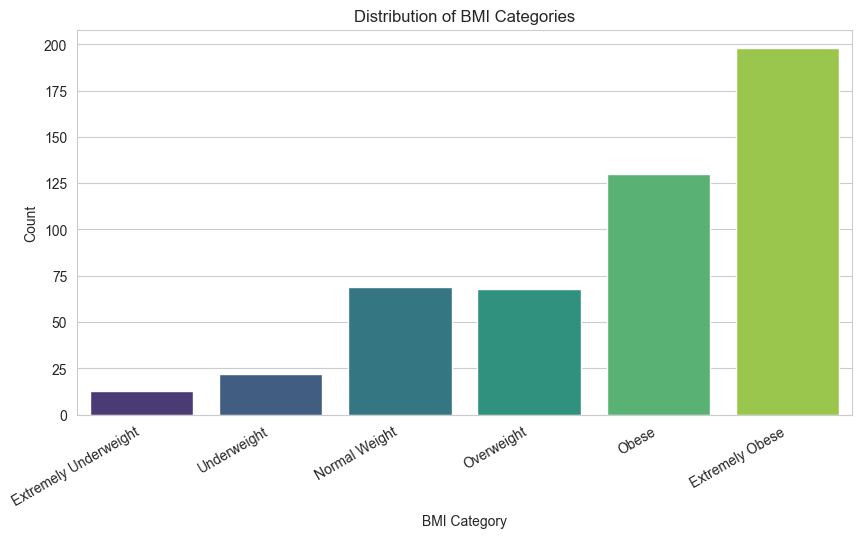

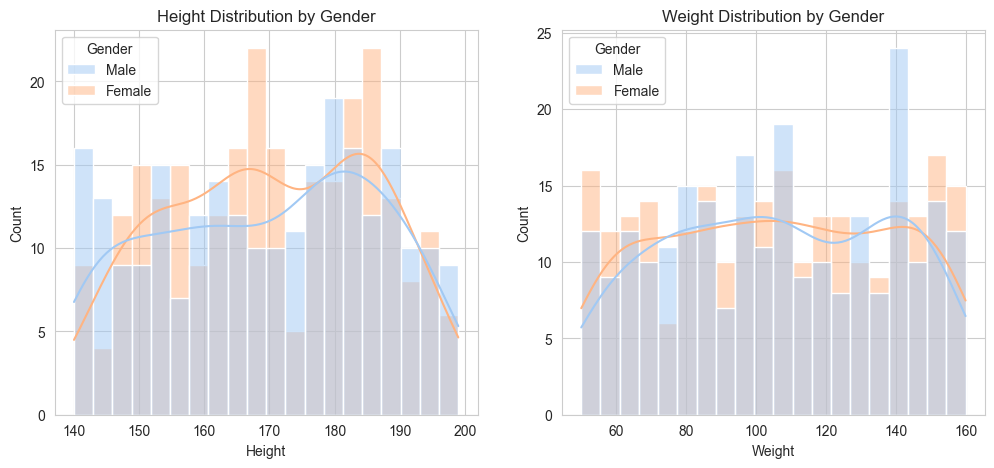

/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/488351861.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([bmi_mapping[i] for i in sorted(df['Index'].unique())], rotation=30, ha="right")


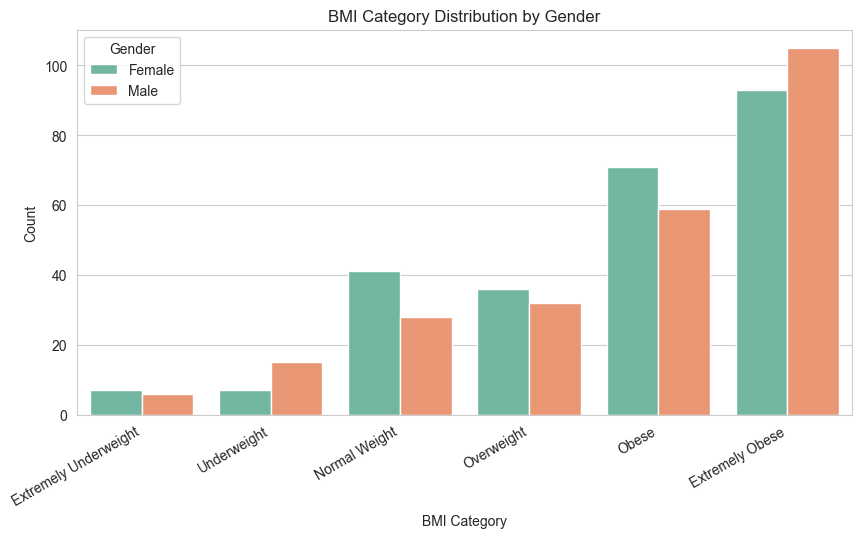

/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/488351861.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Height", data=df, palette="pastel")
/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/488351861.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Weight", data=df, palette="pastel")


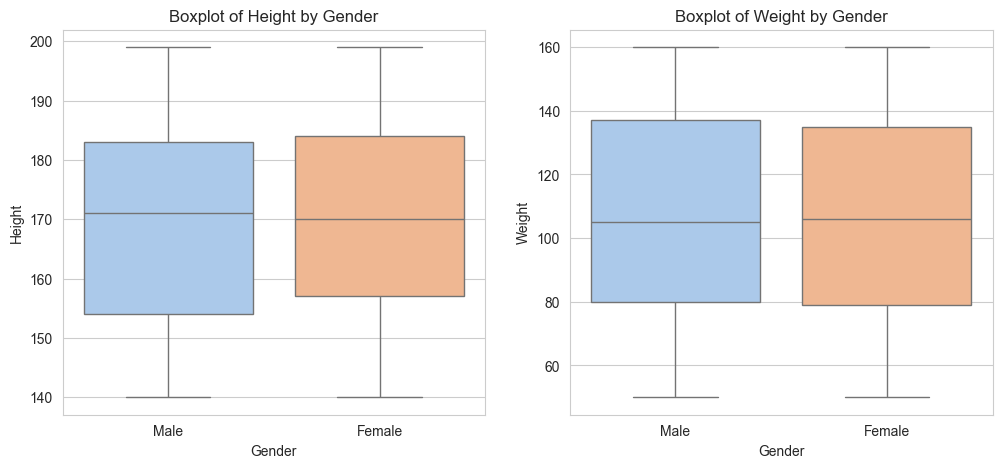

In [205]:
#  BMI Category Distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df['Index'], palette="viridis")

# Change x-axis labels to actual BMI category names
ax.set_xticklabels([bmi_mapping[i] for i in sorted(df['Index'].unique())], rotation=30, ha="right")

plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()


# Gender-Specific Distribution for Height and Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df, x="Height", hue="Gender", kde=True, bins=20, palette="pastel")
plt.title("Height Distribution by Gender")

plt.subplot(1, 2, 2)
sns.histplot(df, x="Weight", hue="Gender", kde=True, bins=20, palette="pastel")
plt.title("Weight Distribution by Gender")

plt.show()

# Gender-Specific BMI Category Distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df['Index'], hue=df['Gender'], palette="Set2")

# Change x-axis labels to actual BMI category names
ax.set_xticklabels([bmi_mapping[i] for i in sorted(df['Index'].unique())], rotation=30, ha="right")

plt.title("BMI Category Distribution by Gender")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# Boxplots for Height and Weight by Gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Gender", y="Height", data=df, palette="pastel")
plt.title("Boxplot of Height by Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x="Gender", y="Weight", data=df, palette="pastel")
plt.title("Boxplot of Weight by Gender")

plt.show()

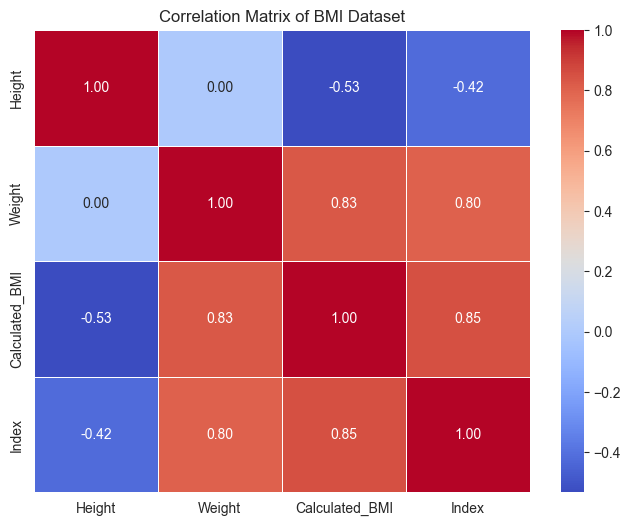

In [206]:
# Convert height to meters and calculate BMI
df['Height_m'] = df['Height'] / 100
df['Calculated_BMI'] = df['Weight'] / (df['Height_m'] ** 2)

# Compute the correlation matrix
correlation_matrix = df[['Height', 'Weight', 'Calculated_BMI', 'Index']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of BMI Dataset")
plt.show()

### Data Preprocessing
#### Manage Imbalanced Data

In [207]:
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

X = df[['Gender_Encoded', 'Height', 'Weight']]
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Standardize height and weight features for better model performance:
1. StandardScaler is applied to Height and Weight
2. Converts values to zero mean and unit variance better for SVM & Logistic Regression
3. Prevents large values (like height in cm) from dominating the model

In [208]:
# Standardize Height and Weight, I made sure to apply scaling after SMOTE
scaler = StandardScaler()
X_train_balanced[['Height', 'Weight']] = scaler.fit_transform(X_train_balanced[['Height', 'Weight']])
X_test[['Height', 'Weight']] = scaler.transform(X_test[['Height', 'Weight']])

### Visualizing Before and After SMOTE

/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/3039425195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="viridis")
/var/folders/1d/c3kkj4950kg7mfcckwvyk5xm0000gn/T/ipykernel_51980/3039425195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, ax=axes[1], palette="viridis")


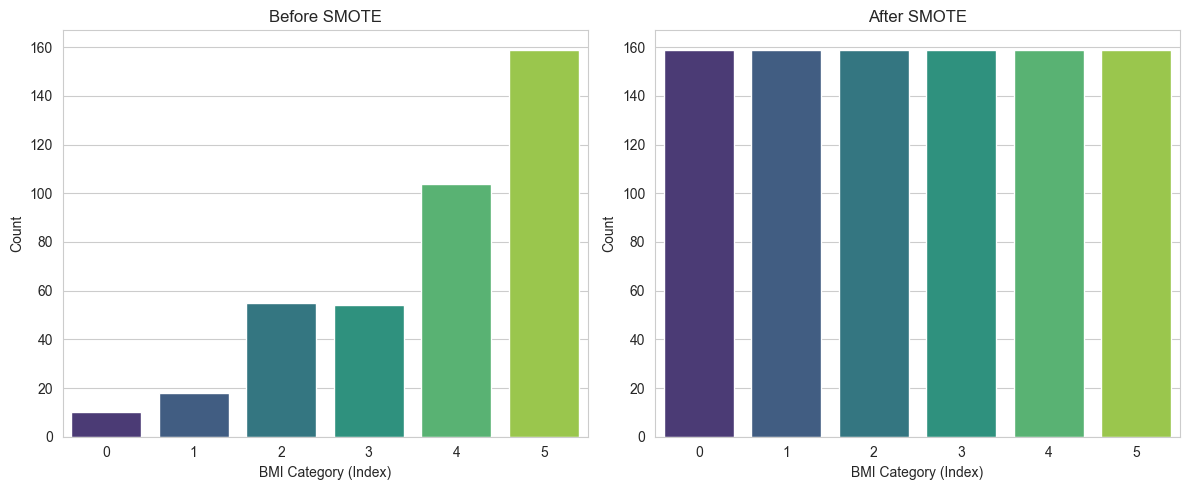

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Resampling
sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("BMI Category (Index)")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_train_balanced, ax=axes[1], palette="viridis")
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("BMI Category (Index)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Model Training and Prediction
#### Divide the dataset into training and testing sets
##### When splitting a dataset into training and testing sets, stratify ensures that the proportions of a specified variable (e.g., gender or BMI category) are maintained in both the training and testing sets.

In [210]:
# Encode 'Gender' (Male/Female) to numeric values
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select Features and Target
X = df[['Gender_Encoded', 'Height', 'Weight']]  # Features
y = df['Index']  # Target variable (BMI category)

# Ensure both gender and BMI category representation is balanced using stratification on `y`
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratify using BMI categories (Index)
)

# Check gender and BMI category distribution in training and testing sets
train_gender_distribution = X_train['Gender_Encoded'].value_counts(normalize=True)
test_gender_distribution = X_test['Gender_Encoded'].value_counts(normalize=True)

# Display the gender distribution in both sets
print("Gender Distribution in Training Set:\n", train_gender_distribution)
print("\nGender Distribution in Testing Set:\n", test_gender_distribution)

Gender Distribution in Training Set:
 Gender_Encoded
1    0.5175
0    0.4825
Name: proportion, dtype: float64

Gender Distribution in Testing Set:
 Gender_Encoded
0    0.52
1    0.48
Name: proportion, dtype: float64


### Train classification models (Logistic Regression, SVM and KNN) and make predictions on BMI categories.


Model: Logistic Regression
Accuracy Score: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.33      0.25      0.29         4
           2       0.85      0.79      0.81        14
           3       0.67      0.71      0.69        14
           4       0.80      0.77      0.78        26
           5       0.95      0.95      0.95        39

    accuracy                           0.82       100
   macro avg       0.70      0.74      0.71       100
weighted avg       0.82      0.82      0.82       100

------------------------------------------------------


/opt/anaconda3/envs/cnn_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


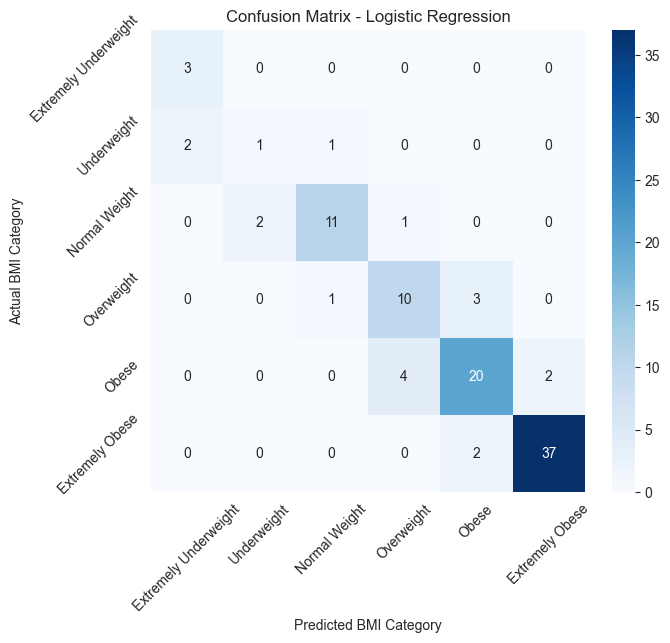


Model: SVM
Accuracy Score: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       1.00      0.00      0.00         4
           2       0.54      0.93      0.68        14
           3       0.89      0.57      0.70        14
           4       0.83      0.96      0.89        26
           5       0.97      0.92      0.95        39

    accuracy                           0.82       100
   macro avg       0.87      0.56      0.54       100
weighted avg       0.87      0.82      0.79       100

------------------------------------------------------


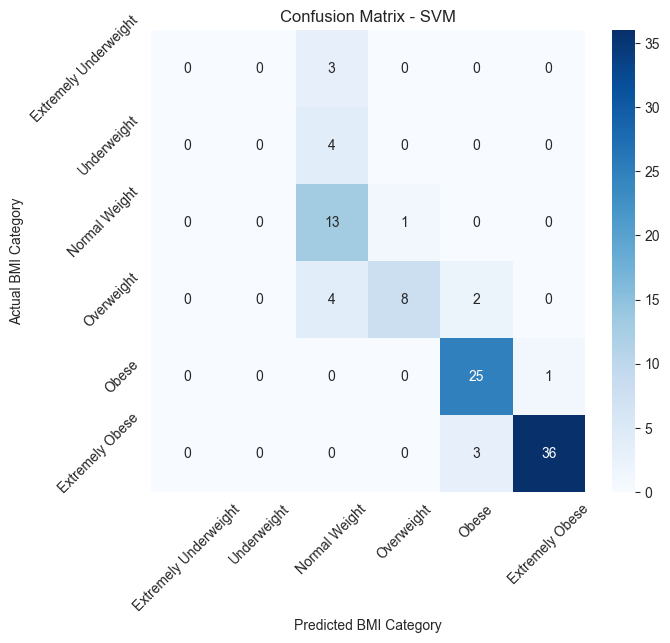


Model: KNN
Accuracy Score: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.93      1.00      0.97        14
           3       0.91      0.71      0.80        14
           4       0.77      0.88      0.82        26
           5       0.95      0.90      0.92        39

    accuracy                           0.89       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.90      0.89      0.89       100

------------------------------------------------------


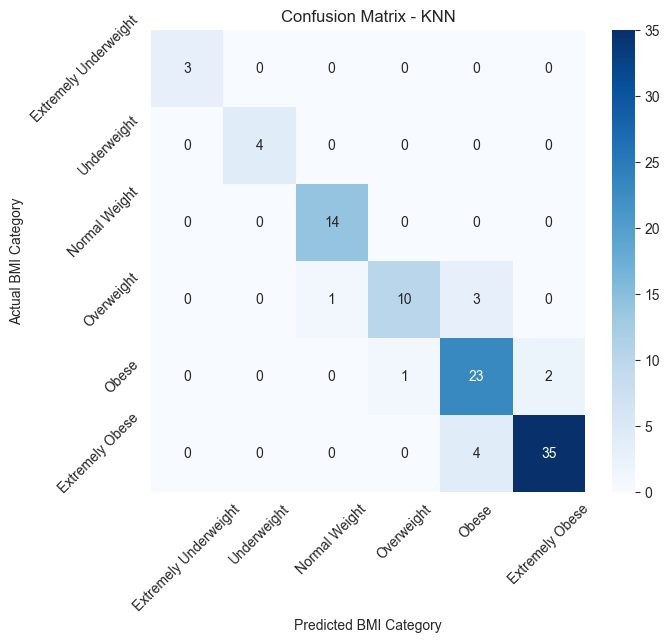

In [211]:
# Define a function to train, evaluate, and plot confusion matrix
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, class_labels):
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    
    cm = confusion_matrix(y_test, predictions)

    print(f"\nModel: {model_name}")
    print("Accuracy Score:", accuracy_score(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    
    print("------------------------------------------------------")

    # Plot confusion matrix
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted BMI Category")
    plt.ylabel("Actual BMI Category")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()
class_labels = [
    "Extremely Underweight", 
    "Underweight", 
    "Normal Weight", 
    "Overweight", 
    "Obese", 
    "Extremely Obese"
]

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate(X_train, X_test, y_train, y_test, log_reg, "Logistic Regression", class_labels)

# Train and evaluate SVM
svm_model = SVC()
train_and_evaluate(X_train, X_test, y_train, y_test, svm_model, "SVM", class_labels)

# Train and evaluate KNN (with k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(X_train, X_test, y_train, y_test, knn_model, "KNN", class_labels)

### Gender-Specific Modeling: Train separate models for each gender to evaluate if model performance improves when predicting BMI categories within gender groups
I will follow those steps:

1. Split the dataset into two subsets: one for Males, one for Females.
2. Train and evaluate models separately for each gender.
3. Compare model performance with a combined model.

/opt/anaconda3/envs/cnn_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


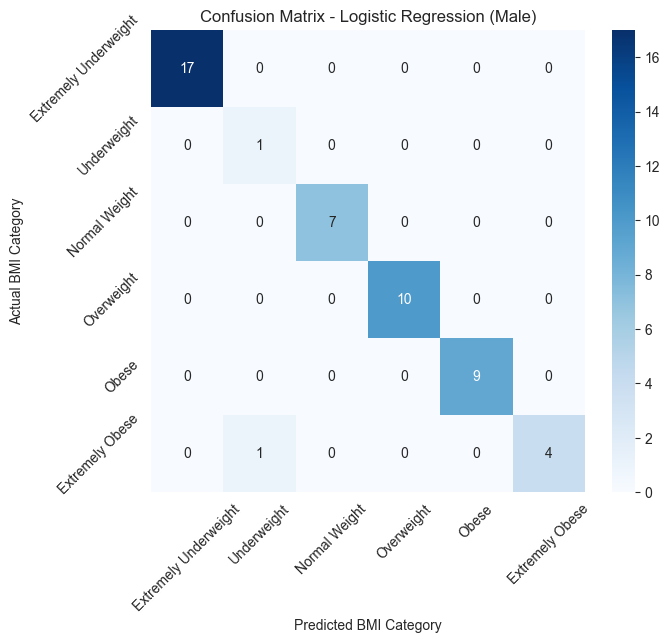

/opt/anaconda3/envs/cnn_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


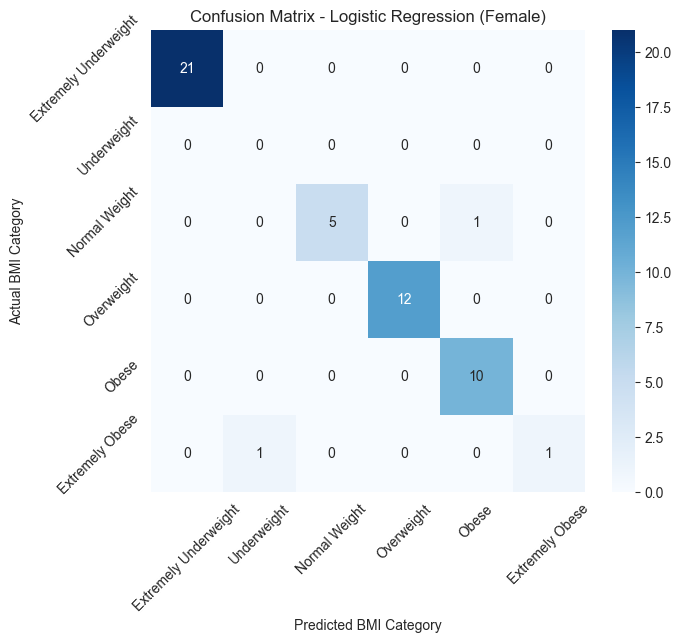

/opt/anaconda3/envs/cnn_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


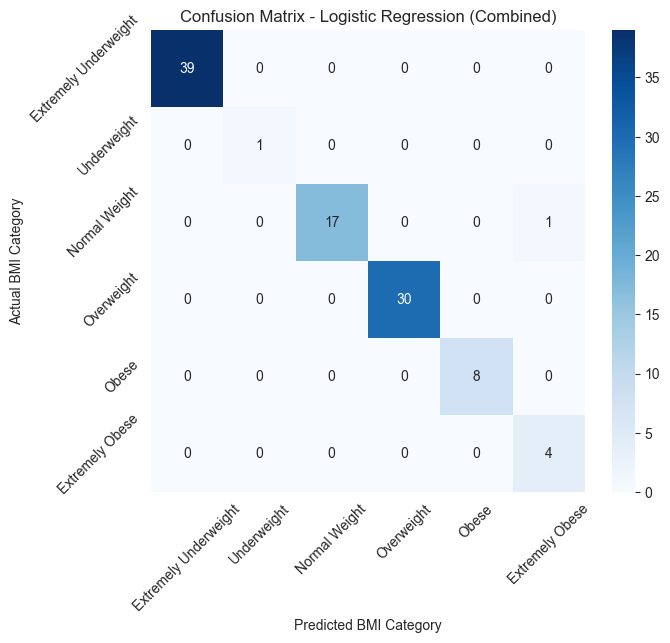

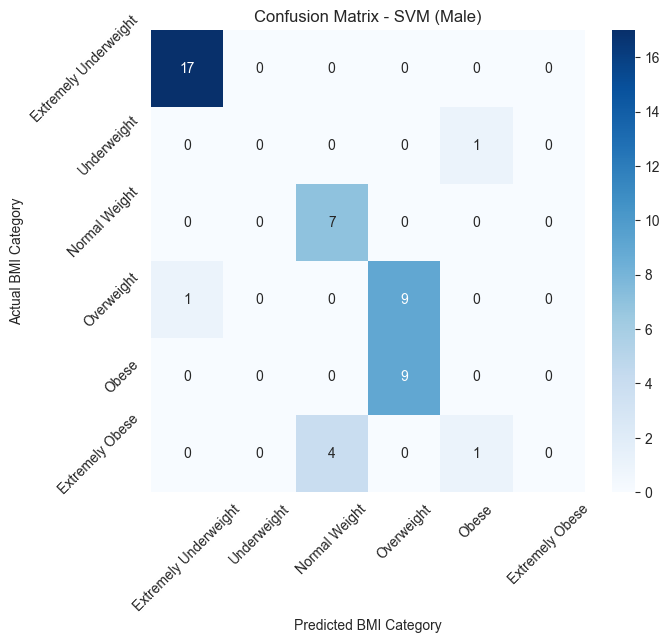

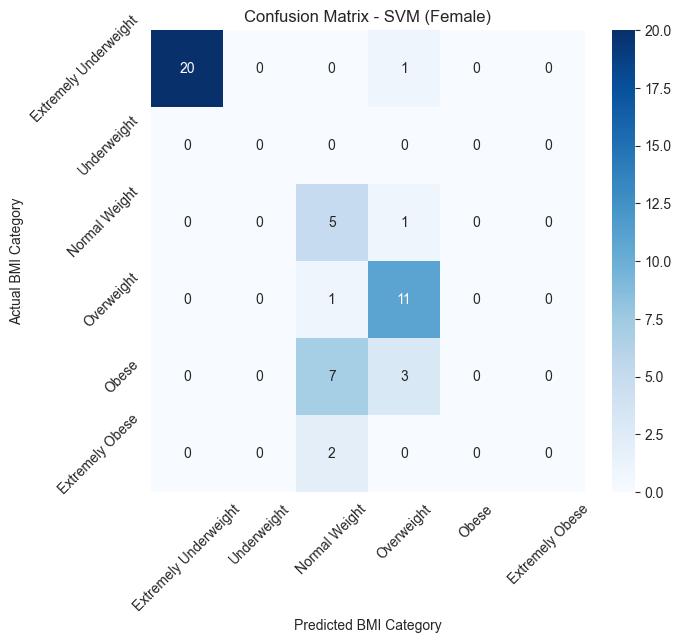

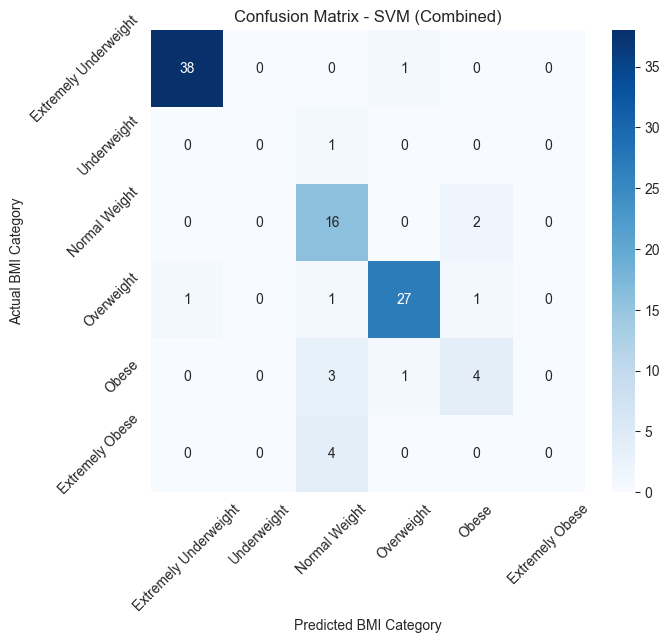

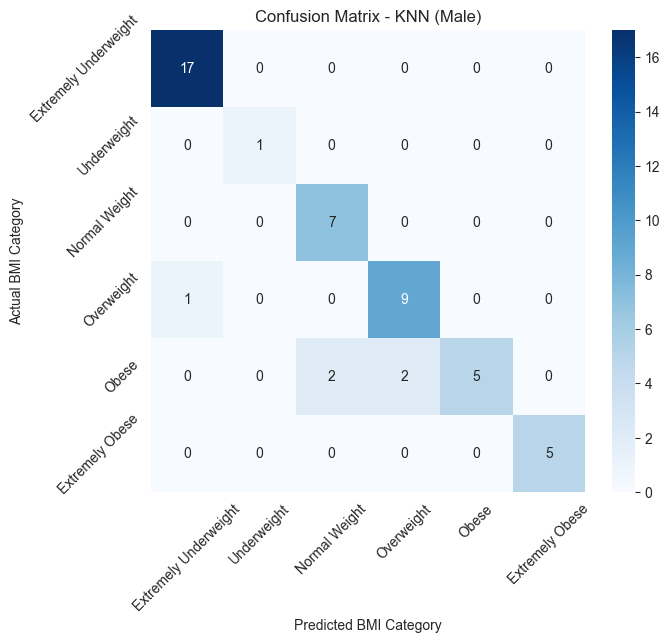

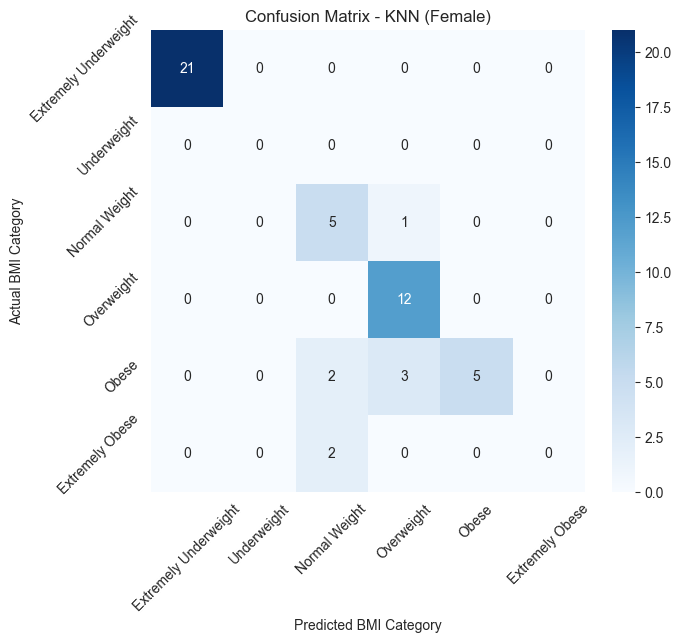

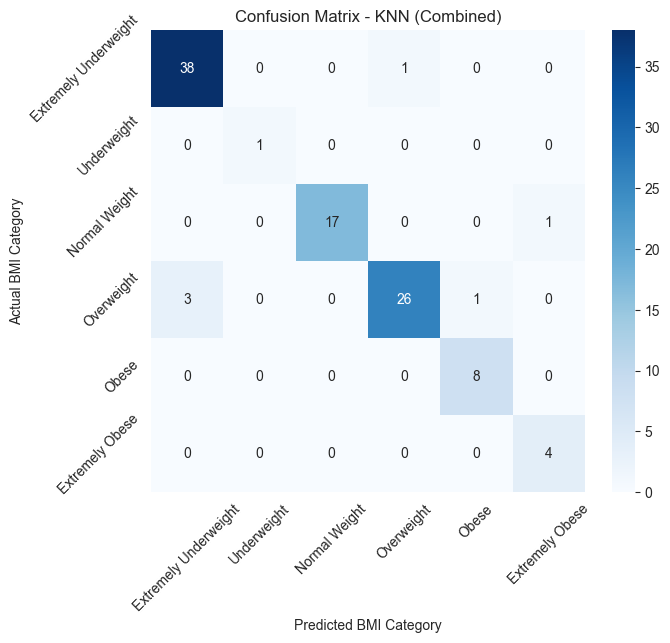


Gender-Specific vs. Generic Model Performance


,Model,Group,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Male,0.979592,0.916667,0.966667,0.925926
1,Logistic Regression,Female,0.960784,0.818182,0.888889,0.754690
2,Logistic Regression,Combined,0.990000,0.966667,0.990741,0.976720
3,SVM,Male,0.673469,0.680135,0.483333,0.565344
4,SVM,Female,0.705882,0.670139,0.450397,0.372919
5,SVM,Combined,0.850000,0.852804,0.543875,0.527855
6,KNN,Male,0.897959,0.923401,0.909259,0.902976
7,KNN,Female,0.843137,0.717593,0.555556,0.531746
8,KNN,Combined,0.940000,0.929780,0.964245,0.943962


In [212]:
label_encoder = LabelEncoder()
df["BMI_Category"] = label_encoder.fit_transform(df["BMI_Category"])

# Split by gender
df_male = df[df["Gender"] == "Male"].drop(columns=["Gender"])
df_female = df[df["Gender"] == "Female"].drop(columns=["Gender"])
df_combined = df.drop(columns=["Gender"])  # Dataset without gender for the combined model

# Define feature-target splits
X_male, y_male = df_male.drop(columns=["BMI_Category"]), df_male["BMI_Category"]
X_female, y_female = df_female.drop(columns=["BMI_Category"]), df_female["BMI_Category"]
X_combined, y_combined = df_combined.drop(columns=["BMI_Category"]), df_combined["BMI_Category"]

# Train-test split (80% train, 20% test)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_female, y_female, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Define BMI categories for the confusion matrix
class_labels = ["Extremely Underweight", "Underweight", "Normal Weight", 
                "Overweight", "Obese", "Extremely Obese"]

# Function to train, evaluate, and store performance
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, group_name, results):
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # Predict on test data

    # Compute performance metrics
    acc = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, zero_division=1, output_dict=True)

    # Compute confusion matrix (Ensure all labels appear)
    cm = confusion_matrix(y_test, predictions, labels=range(6))

    # Store results in DataFrame (Handle missing categories)
    results.append({
        "Model": model_name,
        "Group": group_name,
        "Accuracy": acc,
        "Precision": np.mean([report.get(str(i), {}).get('precision', 0.0) for i in range(6)]),
        "Recall": np.mean([report.get(str(i), {}).get('recall', 0.0) for i in range(6)]),
        "F1-Score": np.mean([report.get(str(i), {}).get('f1-score', 0.0) for i in range(6)])
    })

    # Plot confusion matrix
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted BMI Category")
    plt.ylabel("Actual BMI Category")
    plt.title(f"Confusion Matrix - {model_name} ({group_name})")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Store performance results
results = []

# Train models separately for Male, Female, and Combined datasets
for model_name, model in models.items():
    train_and_evaluate(X_train_m, X_test_m, y_train_m, y_test_m, model, model_name, "Male", results)
    train_and_evaluate(X_train_f, X_test_f, y_train_f, y_test_f, model, model_name, "Female", results)
    train_and_evaluate(X_train_c, X_test_c, y_train_c, y_test_c, model, model_name, "Combined", results)

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results)

# Display the DataFrame
print("\nGender-Specific vs. Generic Model Performance")
# print(results_df)

# Save results as CSV (optional)
results_df.to_csv("gender_model_comparison.csv", index=False)

# Display as a formatted table (if using Jupyter Notebook)
from IPython.display import display
display(results_df)

### Model Evaluation and Comparison

In [216]:
X = df[['Gender_Encoded', 'Height', 'Weight']]
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def compare_model_performance(model, param_grid, model_name):
    default_model = model
    default_model.fit(X_train_scaled, y_train)
    default_predictions = default_model.predict(X_test_scaled)
    default_accuracy = accuracy_score(y_test, default_predictions)
    
    print(f"\nDefault {model_name} Accuracy on test set: {default_accuracy:.4f}")

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cross_val_score = grid_search.best_score_

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validated score: {best_cross_val_score:.4f}")

    tuned_predictions = best_model.predict(X_test_scaled)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)

    print(f"Tuned {model_name} Accuracy on test set: {tuned_accuracy:.4f}")

    improvement = tuned_accuracy - default_accuracy
    print(f"\nImprovement in test accuracy after tuning for {model_name}: {improvement:.4f}")

svm_param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto']
}

log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # k values to test
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

compare_model_performance(SVC(), svm_param_grid, "SVM")
compare_model_performance(LogisticRegression(max_iter=1000), log_reg_param_grid, "Logistic Regression")
compare_model_performance(KNeighborsClassifier(), knn_param_grid, "KNN")



Default SVM Accuracy on test set: 0.8900
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for SVM: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9375
Tuned SVM Accuracy on test set: 0.9400

Improvement in test accuracy after tuning for SVM: 0.0500

Default Logistic Regression Accuracy on test set: 0.9200
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best cross-validated score: 0.9150
Tuned Logistic Regression Accuracy on test set: 0.9300

Improvement in test accuracy after tuning for Logistic Regression: 0.0100

Default KNN Accuracy on test set: 0.8900
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validated score: 0.8675
Tuned KNN Accuracy on test set: 0.9000

Improvement in test accuracy after tuning for KNN: 0.